# Part II - Fordgobike Trip
## by Ephraim Opoku-Agyeman



## Investigation Overview



## Dataset Overview

> This dataset was recorded on bicycle trips, where we have the first half of the dataset about the `start_station` and `end_station`, in relation to their locations, represented with `longitudes` and `latitudes` and finally the `Ids` of the various stations. 

>The second half of the dataset is about the bikers themselves, which includes how old they are - `member_birth_year`, how long it took to ride to the end_stations as `duration_sec` and finally, their gender as `member_gender`.

> In summary, the main features of interest in this dataset are the distance between the start station and end station, how long for the biker to take the trip, if the biker was a male or female and how old is the biker.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
trip_data = pd.read_csv('BIke_trip_data.csv')
trip_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_hrs,distance_km
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,14.495833,0.544709
1,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,17.181667,2.704545
2,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,10.136111,0.260739
3,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,0.440278,2.409301
4,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,0.498056,3.332203


## Visualization 1

> This first visualization is purposed to understand the relationship between distance and time. The dataset as described earlier is about bikers who took trips over various distances over time. Per the visualization we get to understand that most bikers took two (2) hours and that few took longer for various reasons including age and gender. 

> Most bikers also went for a 7km journey with the rest on longer. The transparency in each plotting or dot is important because it makes the clustering clear. If multiple faint dots meet up it causes a surge and this has helped in good analysis.


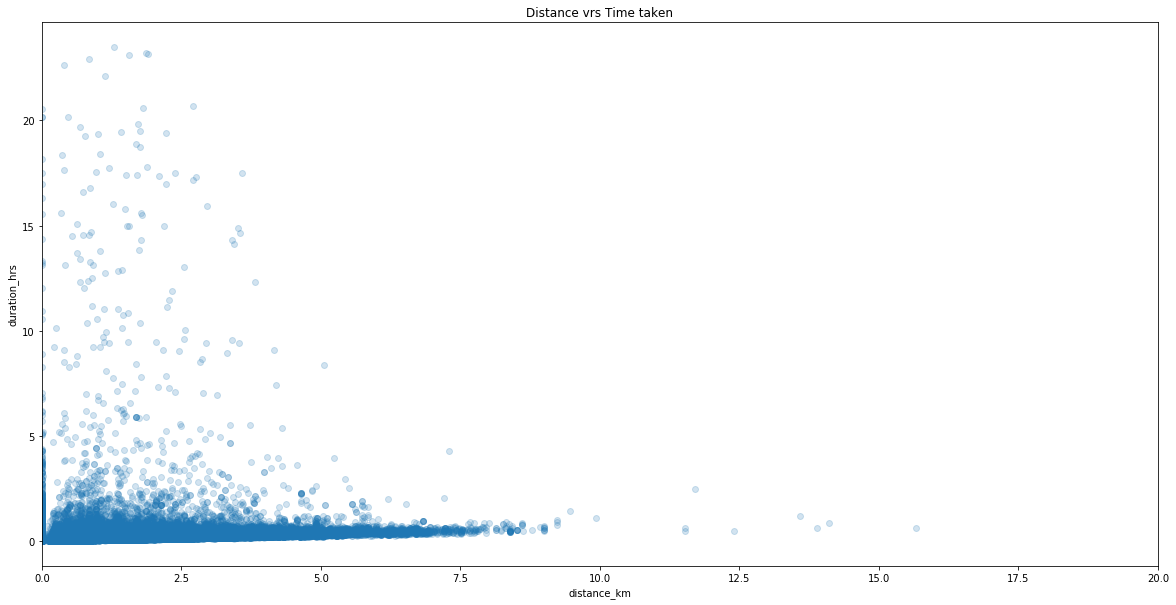

In [3]:
plt.figure(figsize=[20,10])
plt.scatter(data = trip_data, x = 'distance_km', y = 'duration_hrs', alpha=1/5 );
plt.xlabel('distance_km')
plt.ylabel('duration_hrs')
plt.xlim(0, 20)
plt.title('Distance vrs Time taken');

## Visualization 2
>  This second visualization describes the relationship between gender and distance. The aim is to understand the performance of genders with the distances they covered. According to the visualization, females covered more distance than males. However, we have the introduction of another gender type called others, who might have chosen that option in the collection of data and happened to be on par with females.

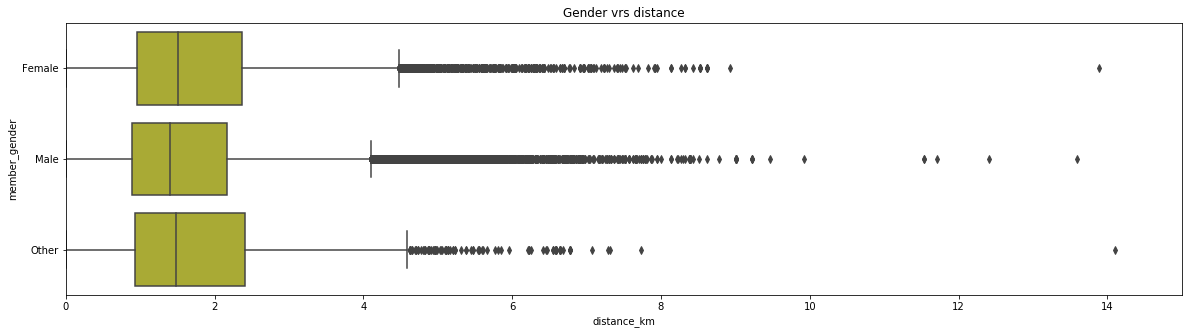

In [4]:
gender_cat = ['Female', 'Male', 'Other']
g_cat = pd.api.types.CategoricalDtype(ordered=True, categories=gender_cat)
trip_data['member_gender'] = trip_data['member_gender'].astype(g_cat);

base_color = sb.color_palette()[8]
plt.figure(figsize=[20,5])
bins = np.arange(0, 10, 0.5)
sb.boxplot(data=trip_data, y='member_gender', x='distance_km', color=base_color);
plt.xlim(0,15)
plt.title('Gender vrs distance');

## Visualization 3
> Here we have a visualization that is between three variables in the dataset that is distance, time and gender. The aim is to give a furthur understanding to gender in relation to distance as discovered earlier and time. As explained in the earlier visualization, the max distance for the genders is 7km. We have now come to the understanding that most bikers accomplished this trip in two (2) to three (3) hours averagely. The furthur dispersion of plots would inform us of few special cases.

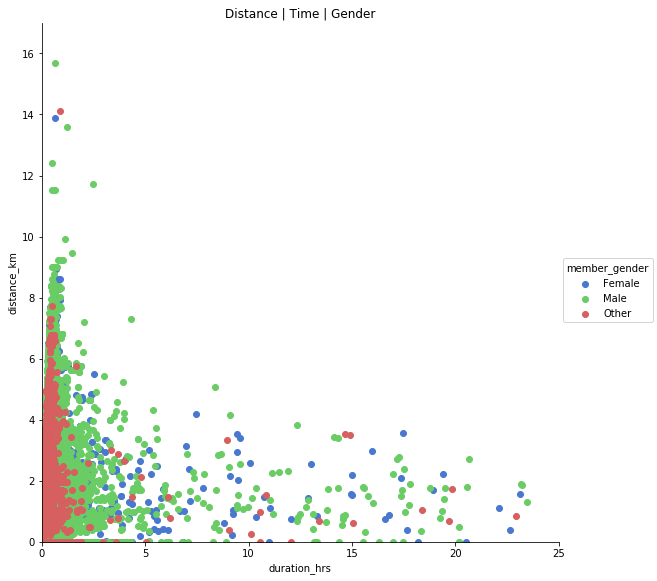

In [5]:

g = sb.FacetGrid(data = trip_data, hue = 'member_gender', size=8,
                 palette = 'muted');
g.map(plt.scatter, 'duration_hrs', 'distance_km');
g.add_legend();
plt.ylim(0,17)
plt.xlim(0,25)
plt.title('Distance | Time | Gender');


### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Bike_Part_II.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Bike_Part_II.ipynb to slides
[NbConvertApp] Writing 432618 bytes to Bike_Part_II.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Bike_Part_II.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
